In [1]:
import csv
import re
import numpy as np
import math
from collections import defaultdict

def read_csv_to_2d_array(file_path):
    data_dict = defaultdict(lambda: defaultdict(lambda: None))
    
    # Regular expression to parse participant ID and session number
    pattern = re.compile(r'(P\d+)\sS(\d+)')
    
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            # Split participant ID and session number
            match = pattern.match(row[0])
            if match:
                participant_id = match.group(1)
                session_number = int(match.group(2)) - 1  # Convert to zero-indexed
                
                # Store the float value in the dictionary
                data_dict[participant_id][session_number] = float(row[1])
    
    # Find the maximum number of sessions to define the array size
    max_sessions = max(max(sessions.keys()) for sessions in data_dict.values()) + 1
    participants = sorted(data_dict.keys())
    
    # Initialize a 2D array with None
    result_array = [[None] * max_sessions for _ in range(len(participants))]
    
    for i, participant_id in enumerate(participants):
        for session_number, value in data_dict[participant_id].items():
            result_array[i][session_number] = value
    
    return result_array, participants

file_path = './data_processed/GMM_results.csv'
array, participants = read_csv_to_2d_array(file_path)

# Print the array
for participant, row in zip(participants, array):
    print(f"{participant}: {row}")


P01: [-16.04, -19.55, None, None, None]
P02: [-14.9, -15.03, -14.81, -15.17, -16.14]
P03: [-49.82, -15.78, None, None, None]
P04: [-77.94, -23.86, -77.94, nan, nan]
P05: [-77.94, -15.62, -17.57, -23.86, -16.96]
P06: [-15.45, -16.06, -16.38, -16.66, -15.44]
P07: [-14.97, -17.2, -15.6, -15.85, -16.71]
P08: [-14.95, -15.29, -15.15, -17.54, -16.44]
P09: [-15.8, -15.69, -15.3, -19.19, -16.03]
P10: [-15.49, -17.13, -14.75, -15.3, -14.63]
P11: [-17.09, -16.22, None, None, None]
P12: [-16.88, -16.71, -15.72, -16.7, -18.48]
P13: [-18.02, -16.34, -14.86, -16.12, -15.48]
P14: [-21.67, -18.34, -18.49, -16.36, -17.83]
P15: [-16.42, -16.46, -17.36, -15.78, -17.38]
P16: [-21.11, -20.98, -18.73, -15.54, -23.21]
P17: [-77.94, -16.39, -77.94, nan, nan]
P18: [-14.6, -18.76, -14.74, -14.83, -14.38]
P19: [-16.02, -16.42, -15.69, -15.95, -17.3]
P20: [-18.51, -23.86, -36.55, -16.78, -16.29]
P21: [-18.06, -14.7, -14.7, -15.42, -14.75]
P22: [-14.45, -16.13, -15.84, -16.05, -15.03]
P23: [-14.97, -16.14, -16.8, 

In [2]:
# other_pid = [5, 6, 7, 8, 9, 10, 12, 13, 14, 19, 22, 24]

# cognitive_normal_pid = [2, 4, 15, 18, 21, 23, 25]

# Remove bad data
# P15 S2, S4 double check
other_pid = [6, 7, 8, 9, 10, 12, 13, 14, 16, 19, 22, 24]

cognitive_normal_pid = [2, 15, 18, 21, 23, 25]

excluded_pid = [1, 3, 11]

In [3]:

# nan count not used. could be useful for avg
# other_data = [0 for _ in range(5)]
# cn_data = [0 for _ in range(5)]

# other_nan_count = [0 for _ in range(5)]
# cn_nan_count = [0 for _ in range(5)]

# for session in range(5)
#     for pid in other_pid:
#         if math.isnan(array[pid][session]):
#             other_nan_count[session] += 1
#         else:
#             other_data[session] += array[pid][session]
#     for pid in cognitive_normal_pid:
#         if math.isnan(array[pid][session]):
#             cn_nan_count[session] += 1
#         else:
#             cn_data[session] += array[pid][session]




In [4]:
other_per_session_data = [[] for _ in range(5)]
cn_per_session_data = [[] for _ in range(5)]

for session in range(5):
    for pid in other_pid:
        other_per_session_data[session].append(array[pid - 1][session])
    for pid in cognitive_normal_pid:
        cn_per_session_data[session].append(array[pid - 1][session])

max_length = max(len(other_pid), len(cognitive_normal_pid))
if len(other_pid) < len(cognitive_normal_pid):
    for session in range(5):
        other_per_session_data[session].extend([np.nan] * (max_length - len(other_pid)))
else:
    for session in range(5):
        cn_per_session_data[session].extend([np.nan] * (max_length - len(cognitive_normal_pid)))

print(other_per_session_data)
print(cn_per_session_data)

[[-15.45, -14.97, -14.95, -15.8, -15.49, -16.88, -18.02, -21.67, -21.11, -16.02, -14.45, -15.25], [-16.06, -17.2, -15.29, -15.69, -17.13, -16.71, -16.34, -18.34, -20.98, -16.42, -16.13, -15.7], [-16.38, -15.6, -15.15, -15.3, -14.75, -15.72, -14.86, -18.49, -18.73, -15.69, -15.84, -16.08], [-16.66, -15.85, -17.54, -19.19, -15.3, -16.7, -16.12, -16.36, -15.54, -15.95, -16.05, -15.51], [-15.44, -16.71, -16.44, -16.03, -14.63, -18.48, -15.48, -17.83, -23.21, -17.3, -15.03, -14.79]]
[[-14.9, -16.42, -14.6, -18.06, -14.97, -15.05, nan, nan, nan, nan, nan, nan], [-15.03, -16.46, -18.76, -14.7, -16.14, -17.06, nan, nan, nan, nan, nan, nan], [-14.81, -17.36, -14.74, -14.7, -16.8, -15.45, nan, nan, nan, nan, nan, nan], [-15.17, -15.78, -14.83, -15.42, -15.36, -15.45, nan, nan, nan, nan, nan, nan], [-16.14, -17.38, -14.38, -14.75, -15.25, -15.16, nan, nan, nan, nan, nan, nan]]


C:\Users\zhoux\AppData\Local\Temp\ipykernel_35324\2417273811.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='NLL', data=data_long, palette="Set3")


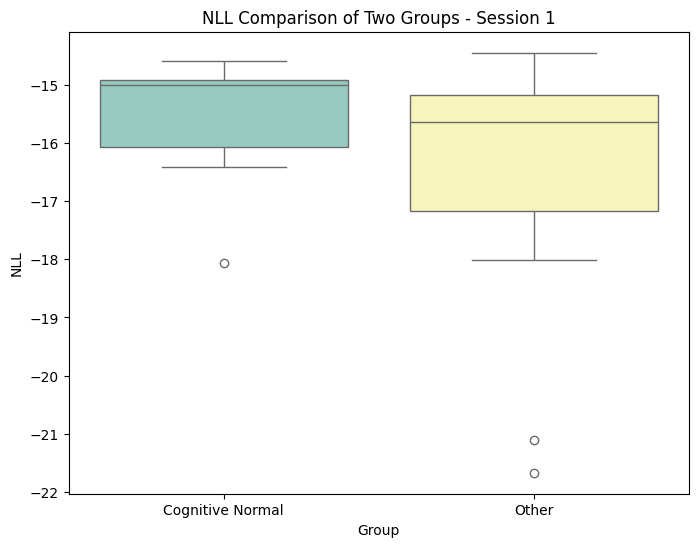

C:\Users\zhoux\AppData\Local\Temp\ipykernel_35324\2417273811.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='NLL', data=data_long, palette="Set3")


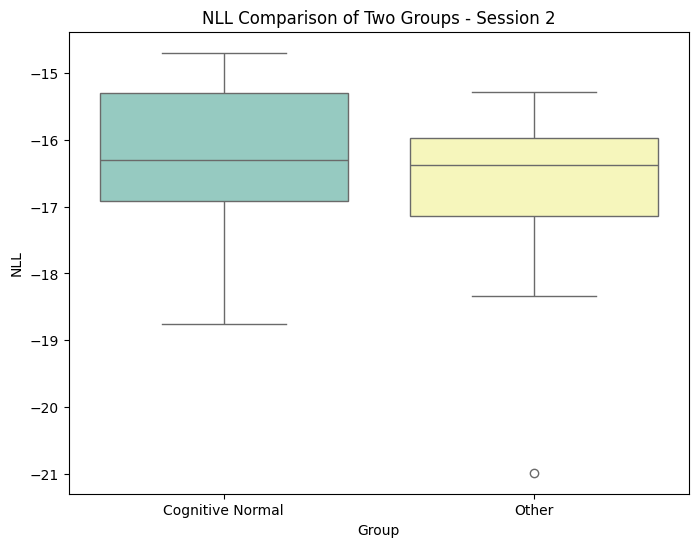

C:\Users\zhoux\AppData\Local\Temp\ipykernel_35324\2417273811.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='NLL', data=data_long, palette="Set3")


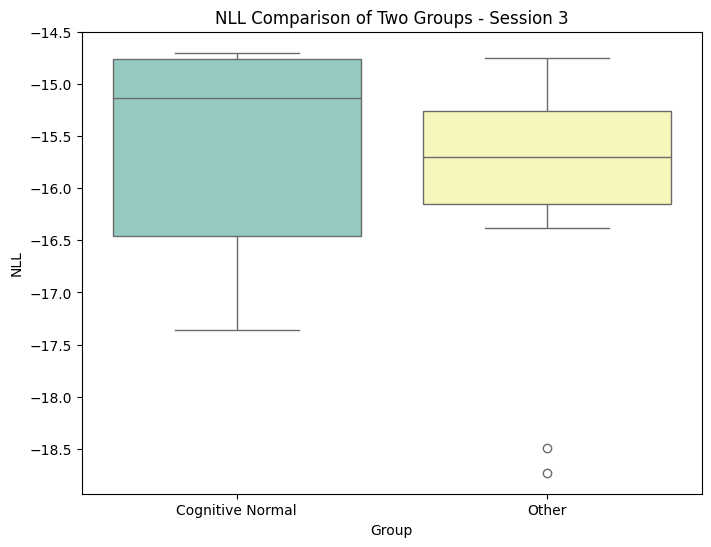

C:\Users\zhoux\AppData\Local\Temp\ipykernel_35324\2417273811.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='NLL', data=data_long, palette="Set3")


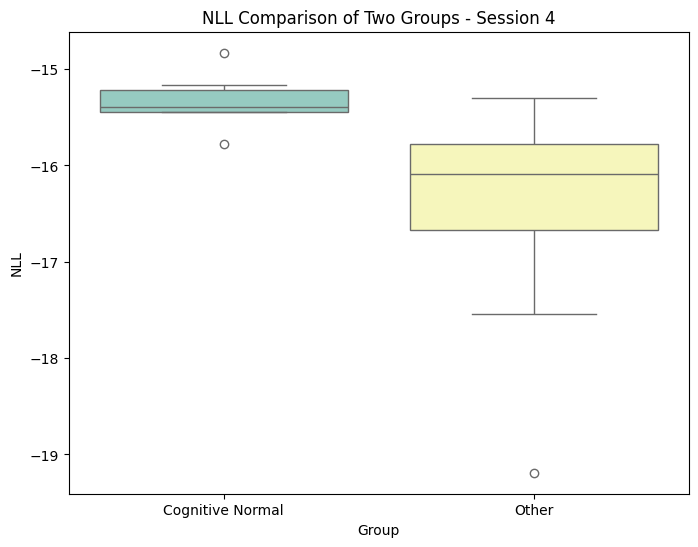

C:\Users\zhoux\AppData\Local\Temp\ipykernel_35324\2417273811.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='NLL', data=data_long, palette="Set3")


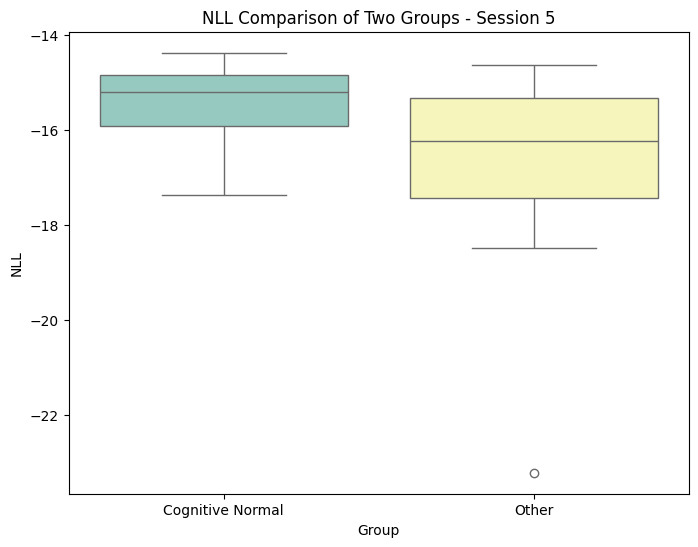

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

for session in range(5):
    # Combine data into a DataFrame for easier plotting
    data = pd.DataFrame({
        'Cognitive Normal': cn_per_session_data[session],
        'Other': other_per_session_data[session]
    })

    # df['Cognitive Normal'] = df['Cognitive Normal'].fillna(df['Cognitive Normal'].mean(), inplace=True)  # Fill with mean
    # df['Other'] = df['Other'].fillna(df['Other'].mean(), inplace=True)  # Fill with mean
    data_long = pd.melt(data, var_name='Group', value_name='NLL')
    
    # Create the box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Group', y='NLL', data=data_long, palette="Set3")
    
    # Customize the plot
    plt.title(f'NLL Comparison of Two Groups - Session {session + 1}')
    plt.xlabel('Group')
    plt.ylabel('NLL')
    
    # Show the plot
    plt.show()


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

other_pid = ['P6', 'P7', 'P8', 'P9', 'P10', 'P12', 'P13', 'P14', 'P16', 'P19', 'P22', 'P24']

cognitive_normal_pid = ['P2', 'P15', 'P18', 'P21', 'P23', 'P25']

df_all = pd.DataFrame(columns=['PID', 'Session', 'NLL', 'Group'])

for participant, row in zip(participants, array):
    print(f"{participant}: {row}")
    group = "Excluded"
    pid = int(participant[1:])
    print(pid)
    if participant in other_pid:
        group = "Other"
    if participant in cognitive_normal_pid:
        group = "CN" #Cognitive Normal
    for session in range(5):
        df_all = pd.concat([df_all, pd.DataFrame({'PID': [participant], 'Session': [f"S{session + 1}"], 'NLL': [array[pid - 1][session]], 'Group':[group]})], ignore_index=True)

df_all = df_all[df_all["Group"] != "Excluded"]

df_cookie = df_all[df_all["Session"].isin(["S1", "S3", "S5"])]
df_picnic = df_all[df_all["Session"].isin(["S2", "S4"])]

print(df_all)
print(df_cookie)
print(df_picnic)

P01: [-16.04, -19.55, None, None, None]
1
P02: [-14.9, -15.03, -14.81, -15.17, -16.14]
2
P03: [-49.82, -15.78, None, None, None]
3
P04: [-77.94, -23.86, -77.94, nan, nan]
4
P05: [-77.94, -15.62, -17.57, -23.86, -16.96]
5
P06: [-15.45, -16.06, -16.38, -16.66, -15.44]
6
P07: [-14.97, -17.2, -15.6, -15.85, -16.71]
7
P08: [-14.95, -15.29, -15.15, -17.54, -16.44]
8
P09: [-15.8, -15.69, -15.3, -19.19, -16.03]
9
P10: [-15.49, -17.13, -14.75, -15.3, -14.63]
10
P11: [-17.09, -16.22, None, None, None]
11
P12: [-16.88, -16.71, -15.72, -16.7, -18.48]
12
P13: [-18.02, -16.34, -14.86, -16.12, -15.48]
13
P14: [-21.67, -18.34, -18.49, -16.36, -17.83]
14
P15: [-16.42, -16.46, -17.36, -15.78, -17.38]
15
P16: [-21.11, -20.98, -18.73, -15.54, -23.21]
16
P17: [-77.94, -16.39, -77.94, nan, nan]
17
P18: [-14.6, -18.76, -14.74, -14.83, -14.38]
18
P19: [-16.02, -16.42, -15.69, -15.95, -17.3]
19
P20: [-18.51, -23.86, -36.55, -16.78, -16.29]
20
P21: [-18.06, -14.7, -14.7, -15.42, -14.75]
21
P22: [-14.45, -16.13,

C:\Users\zhoux\AppData\Local\Temp\ipykernel_35324\2989579797.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat([df_all, pd.DataFrame({'PID': [participant], 'Session': [f"S{session + 1}"], 'NLL': [array[pid - 1][session]], 'Group':[group]})], ignore_index=True)


In [25]:
from utils import plotting

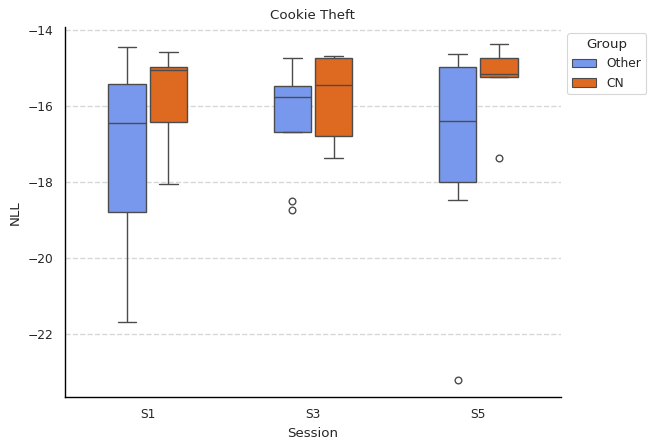

In [28]:
with plotting.paper_theme():
    ax = sns.boxplot(data=df_cookie, x="Session", y="NLL", hue="Group", width=.5, gap=.1)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.set_title('Cookie Theft')

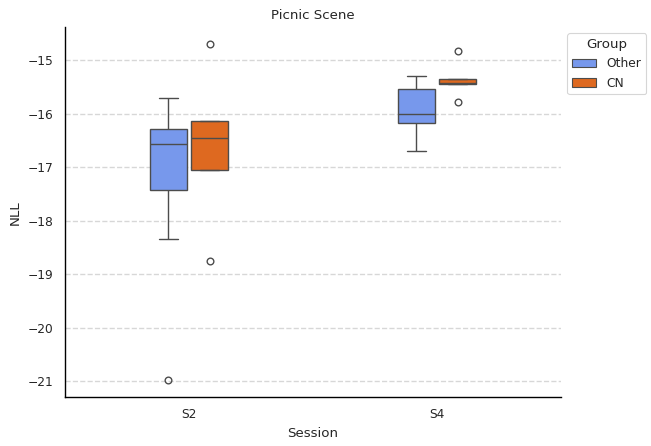

In [30]:
with plotting.paper_theme():
    ax = sns.boxplot(data=df_picnic, x="Session", y="NLL", hue="Group", width=.5/3*2, gap=.1)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.set_title('Picnic Scene')